Download a real world dataset containing at least 1000 samples and more than 10 features. Perform exploratory data analysis to understand the dataset's structure. Apply Principal Component Analysis to reduce dimensionality and analyze variance explained by principal components. Visualize the dataset using different sets of principal components and interpret the results. 

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [3]:
wine_quality = fetch_ucirepo(id=186)
wq_X = wine_quality.data.features
wq_y = wine_quality.data.targets

In [4]:
wq_X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [5]:
wq_y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


Checking for null values

In [6]:
print(wq_X.isnull().sum())
print(wq_y.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
quality    0
dtype: int64


In [7]:
wq_X.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [8]:
wq_y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


Plotting boxplots to check whether there are any outliers

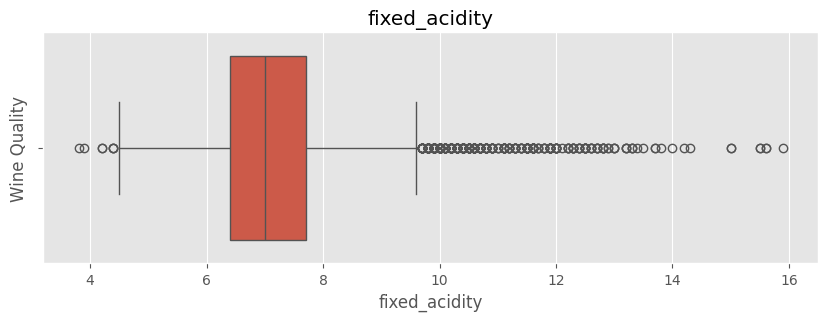

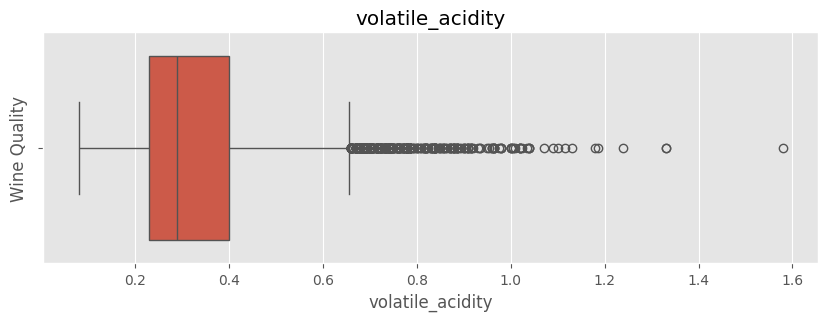

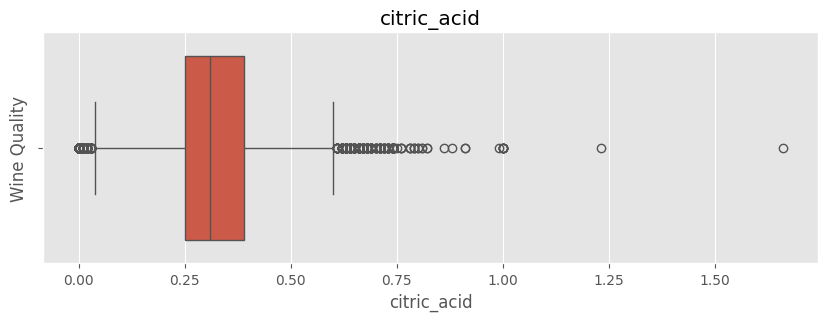

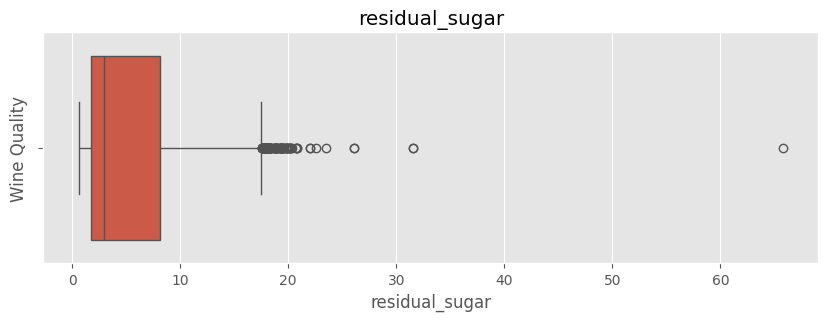

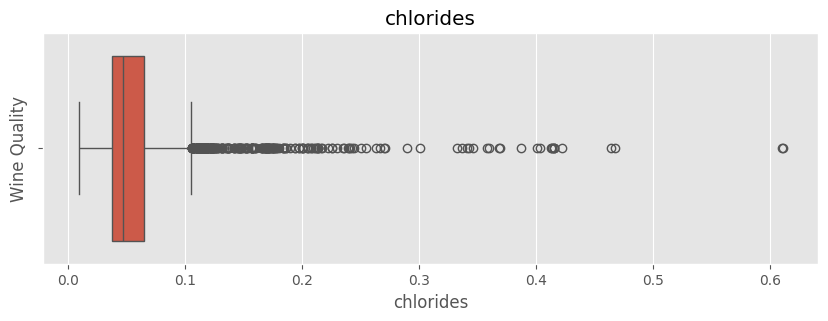

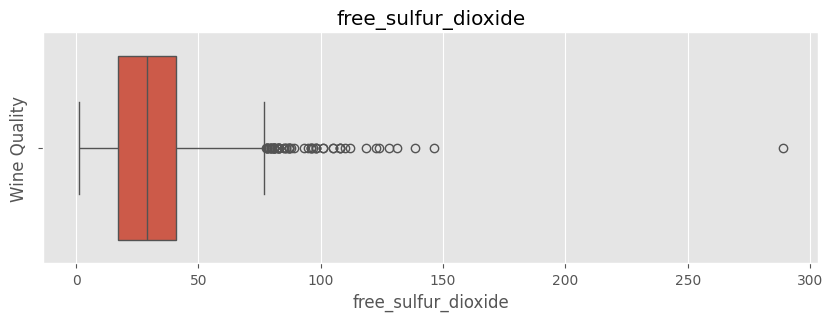

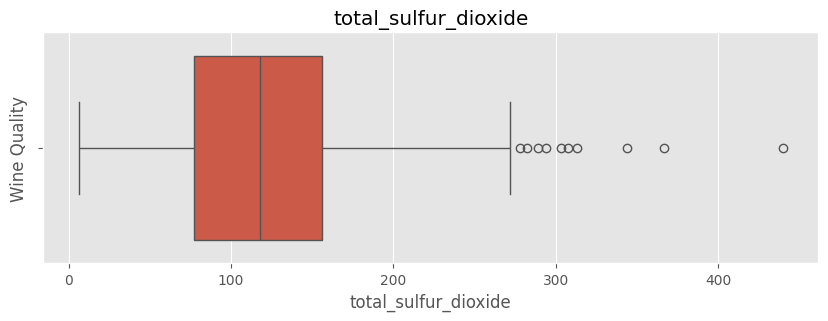

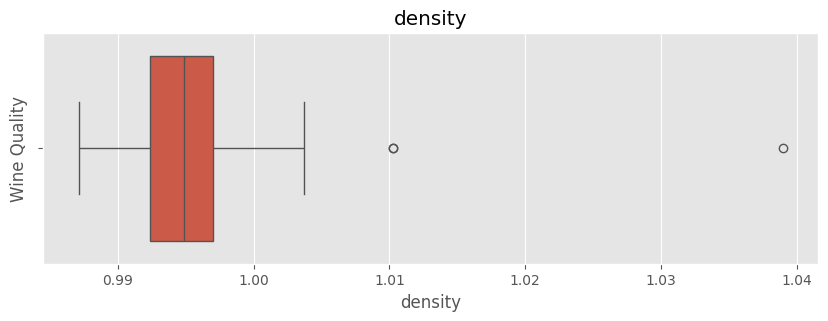

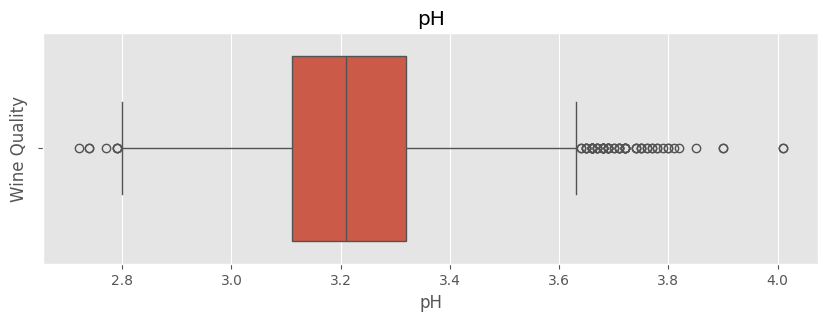

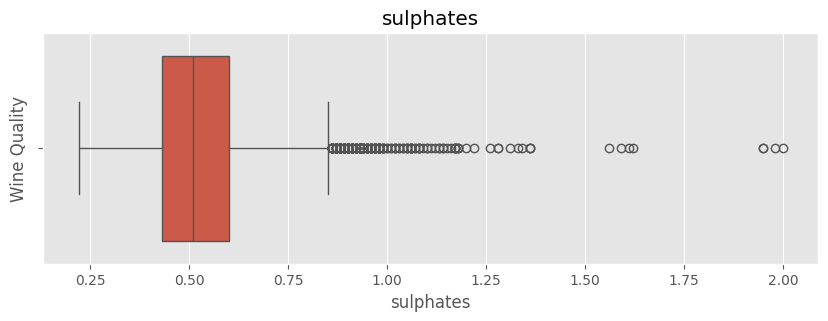

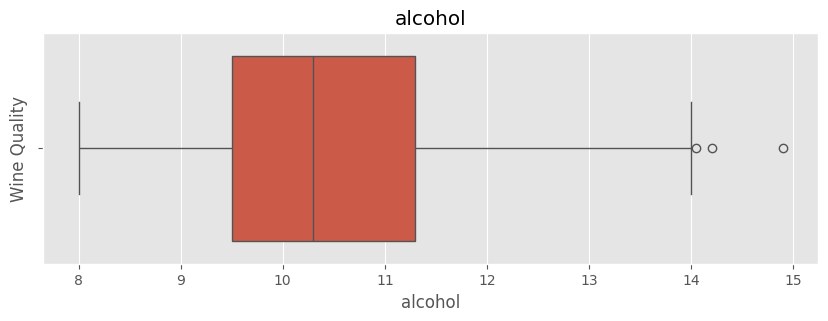

In [9]:
for column in wq_X.columns:
    plt.figure(figsize = (10,3))
    plt.title(column)
    sns.boxplot(wq_X[column], orient='y')
    plt.ylabel('Wine Quality')
    plt.xlabel(column)

Here all the features of the dataset have outliers present in them. 

Next, we remove the outliers using the $1.5 * IQR$ rule. Here we the cap the values according to the lower elimit and upper lemit.

In [10]:
def remove_outlier(df, columns):
    df_copy = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)

        df_copy.loc[df[column] > upper_limit, column] = upper_limit
        df_copy.loc[df[column] < lower_limit, column] = lower_limit
    return df_copy

Created a new dataframe from the features dataframe after removing outliers

In [11]:
new_df = remove_outlier(wq_X, wq_X.columns)

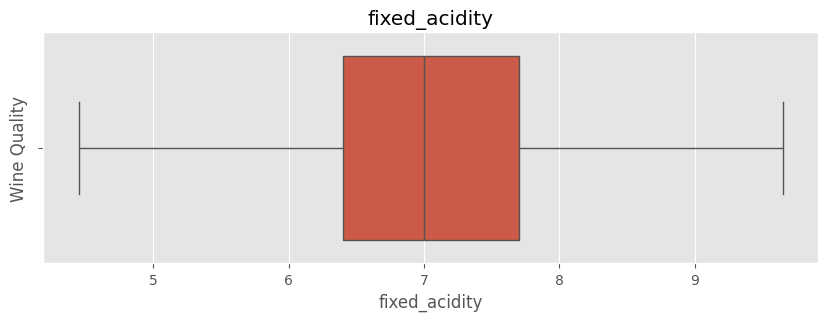

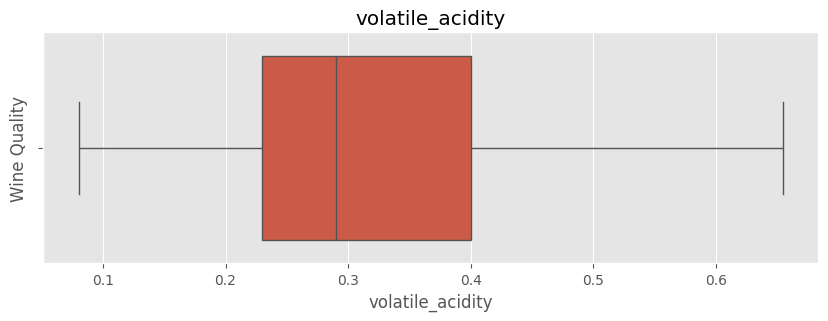

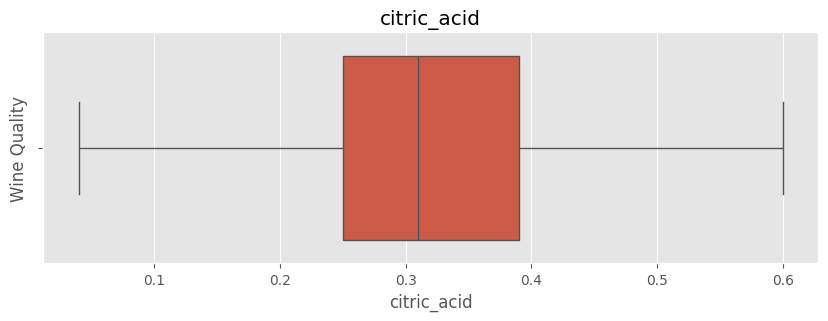

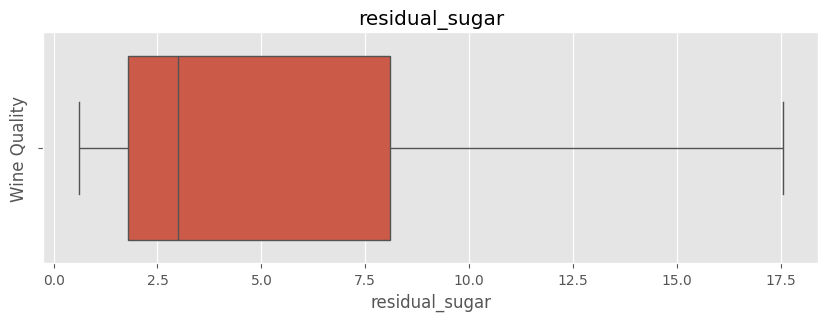

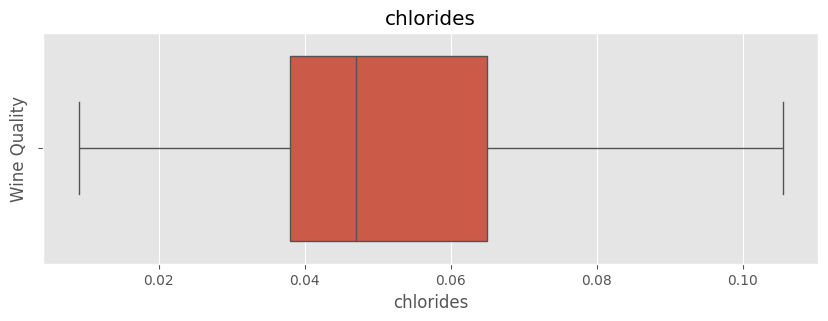

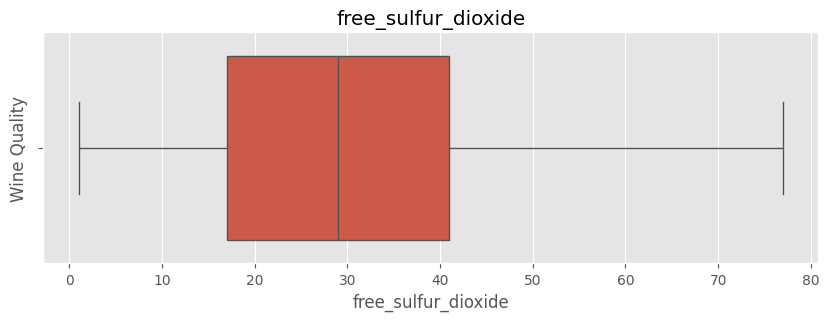

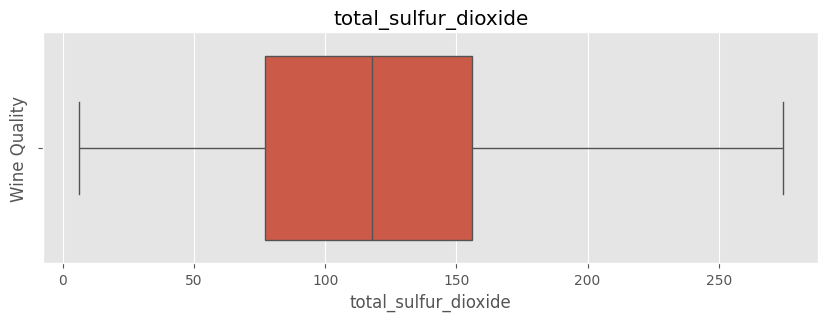

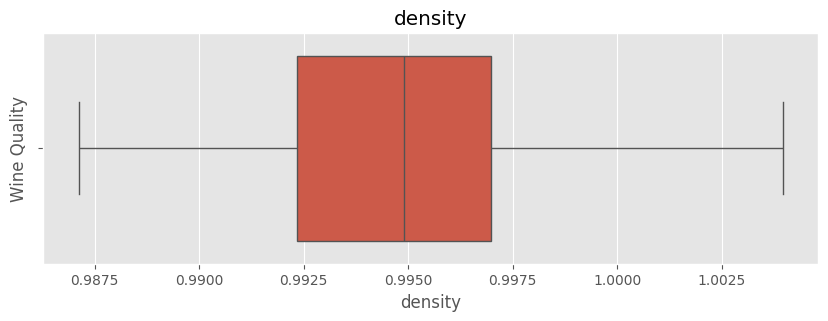

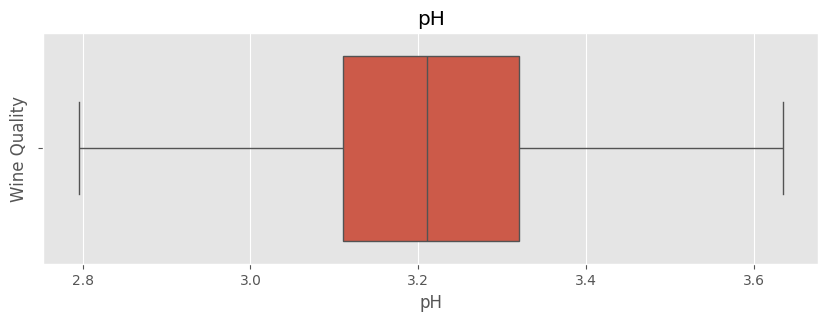

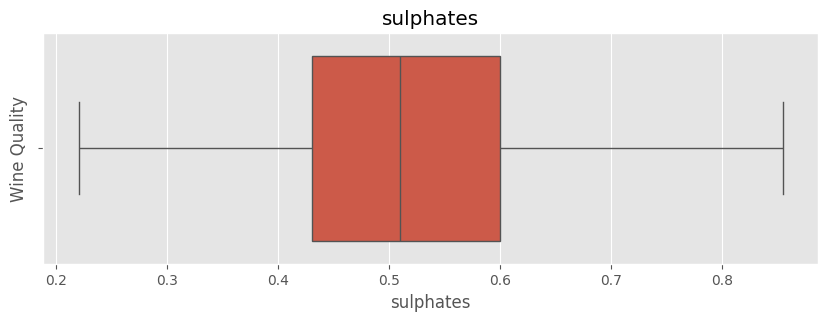

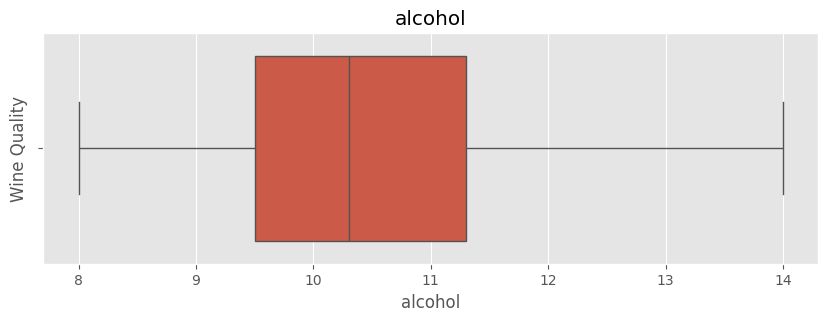

In [12]:
for column in new_df.columns:
    plt.figure(figsize = (10,3))
    plt.title(column)
    sns.boxplot(new_df[column], orient='y')
    plt.ylabel('Wine Quality')
    plt.xlabel(column)

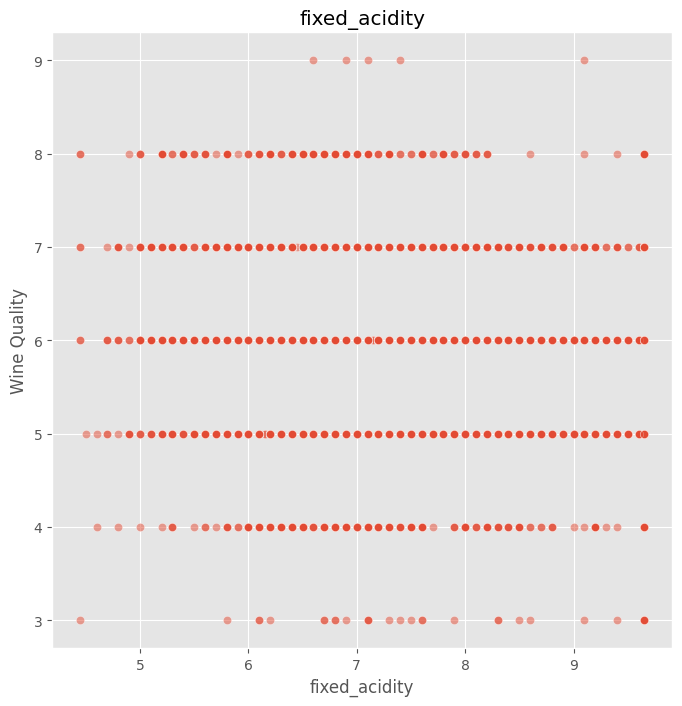

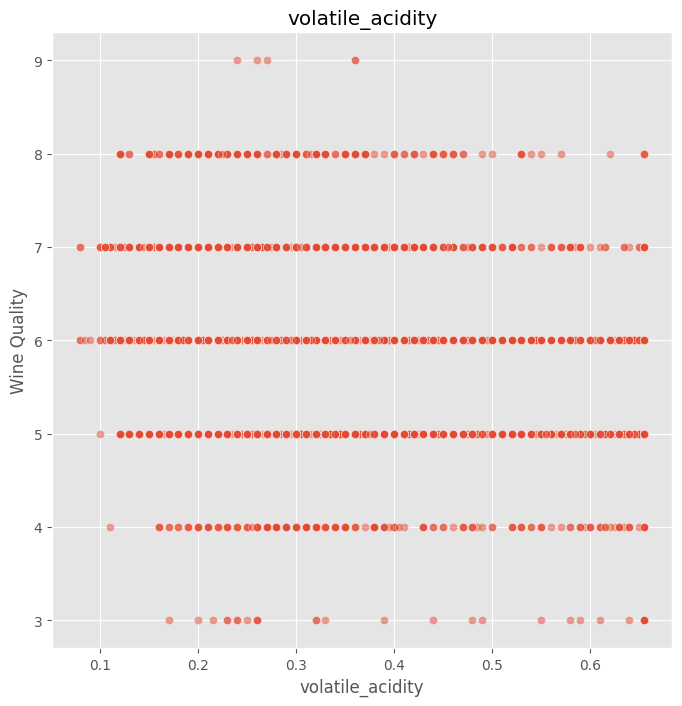

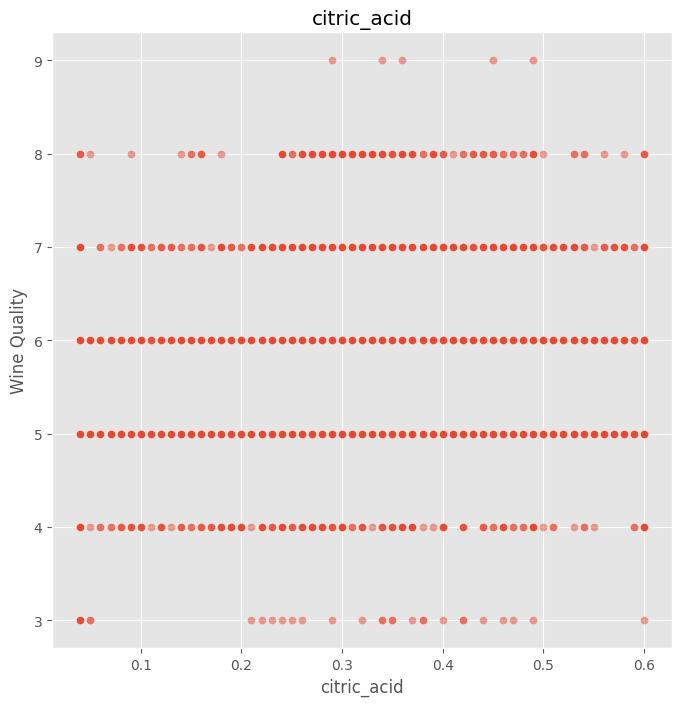

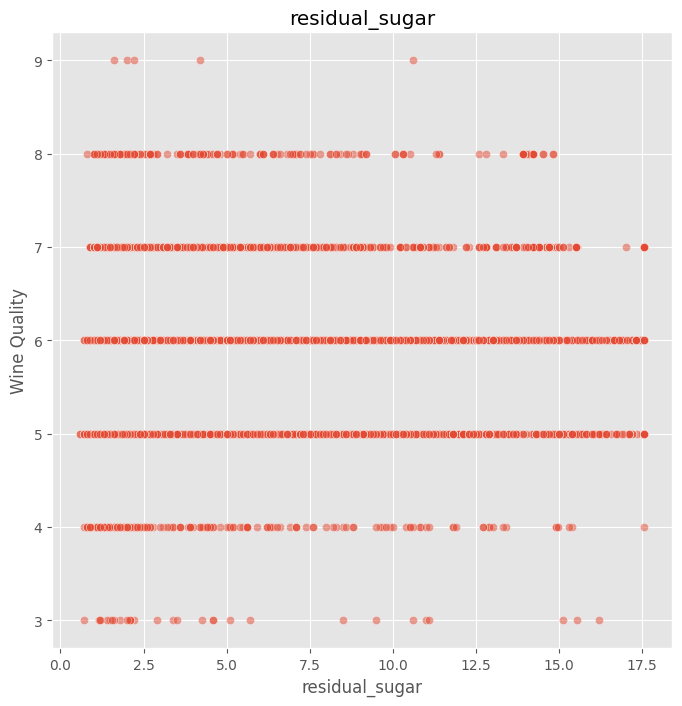

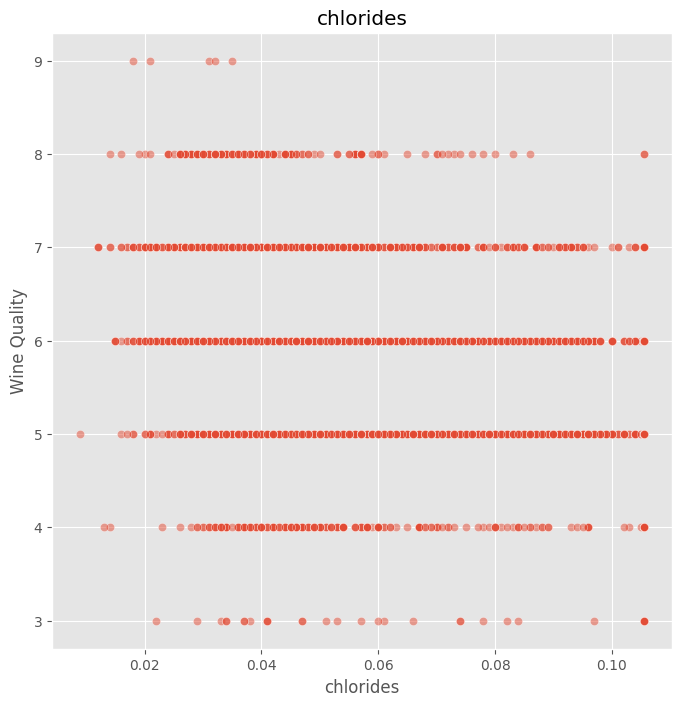

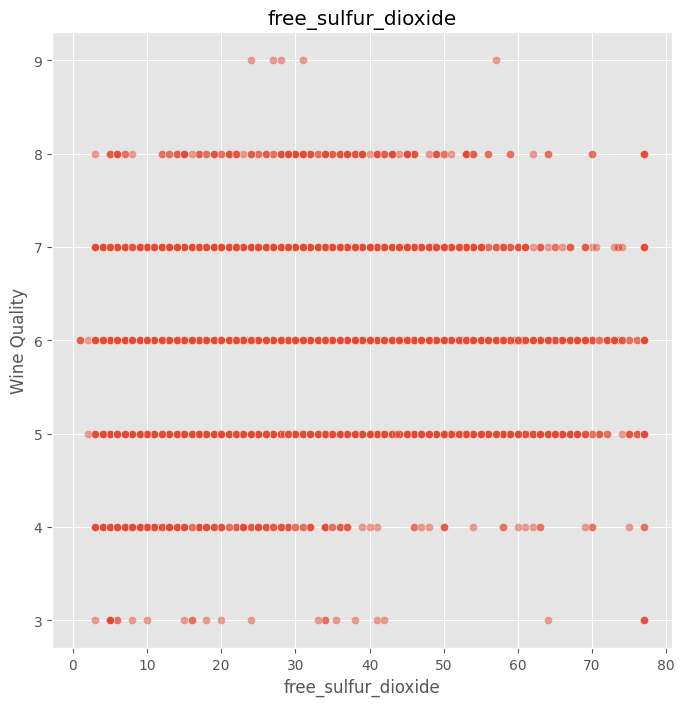

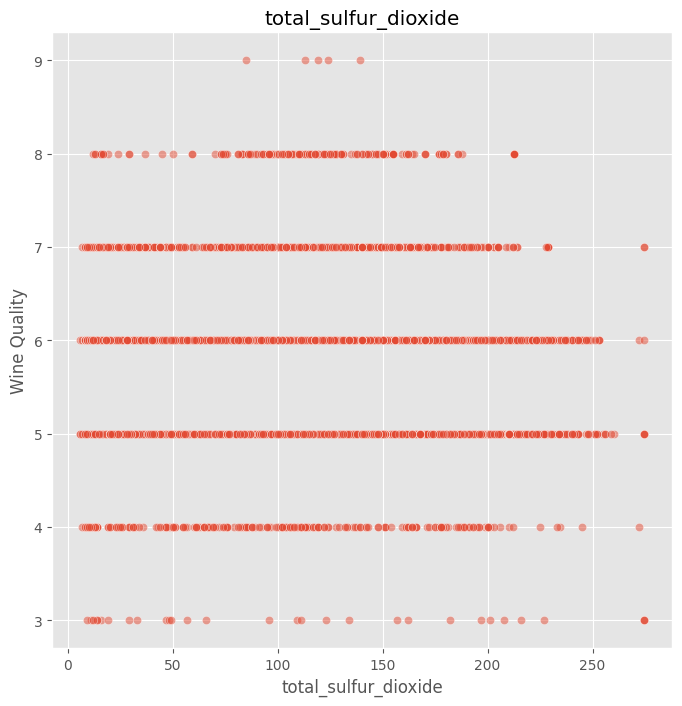

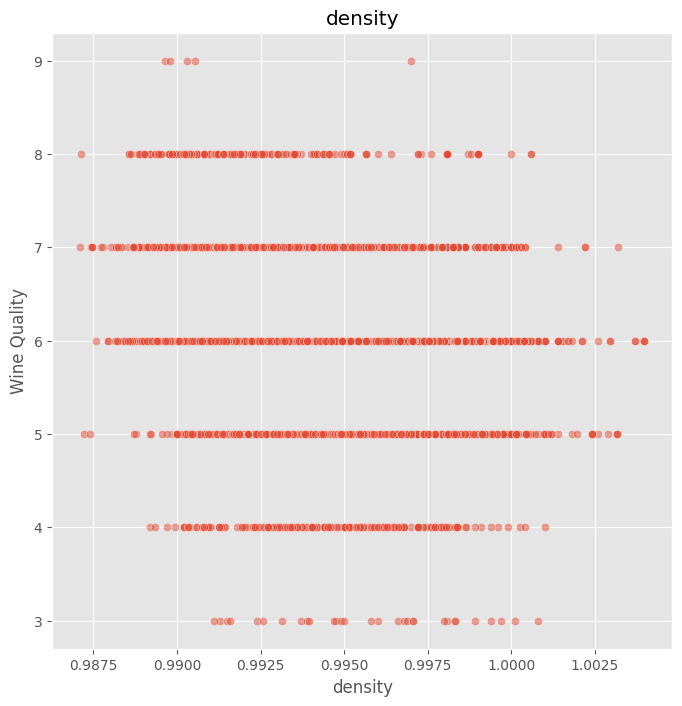

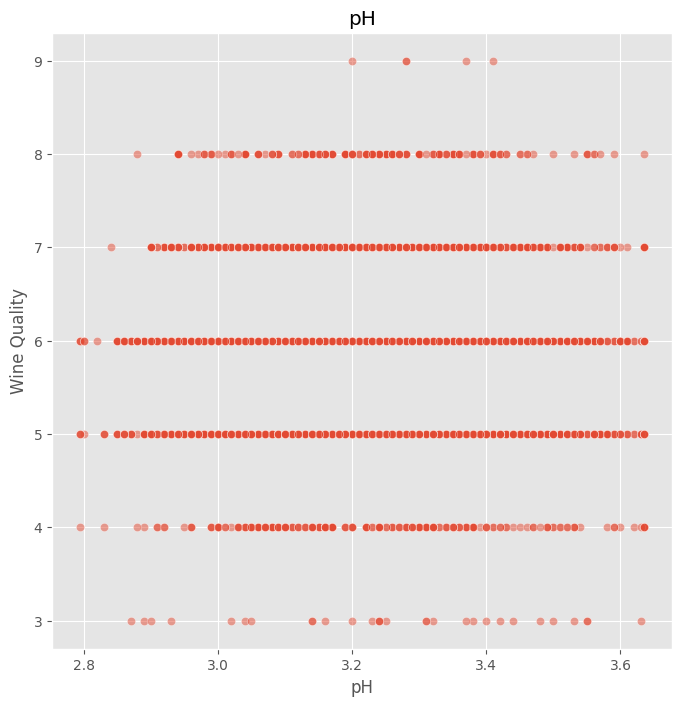

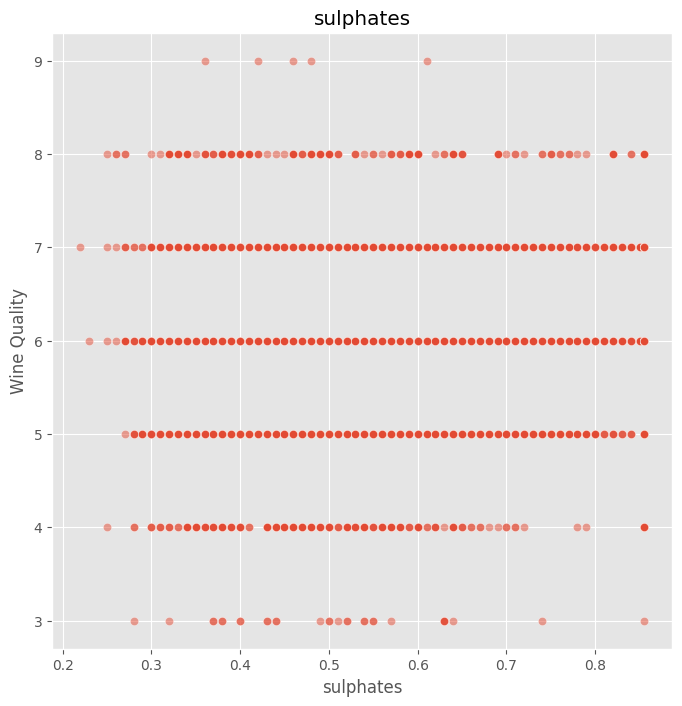

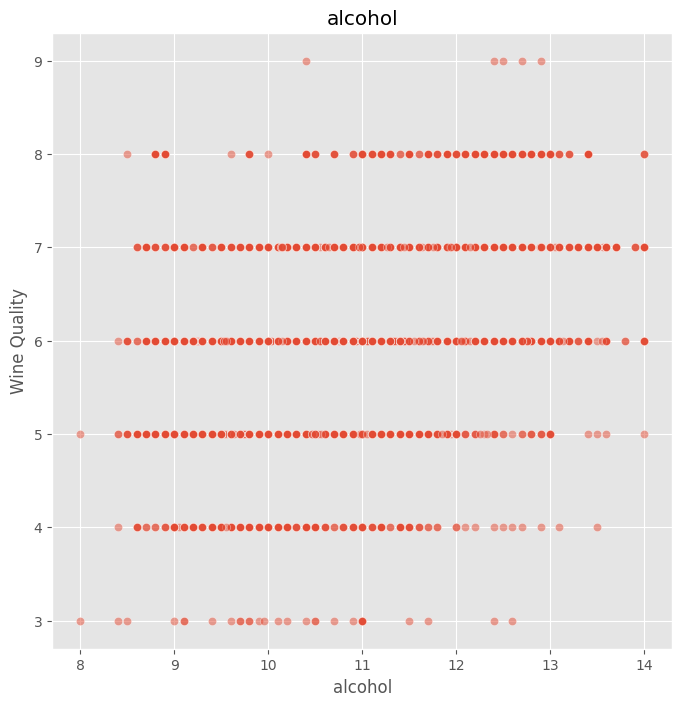

In [13]:
combined = pd.concat([new_df, wq_y], axis=1)
for column in new_df.columns:
    # column = wq_X_copy[column].to_numpy().ravel()
    plt.figure(figsize = (8,8))
    plt.title(column)
    sns.scatterplot(x=column, y="quality", alpha=0.5, data=combined)
    plt.ylabel('Wine Quality')
    plt.xlabel(column)
plt.show()

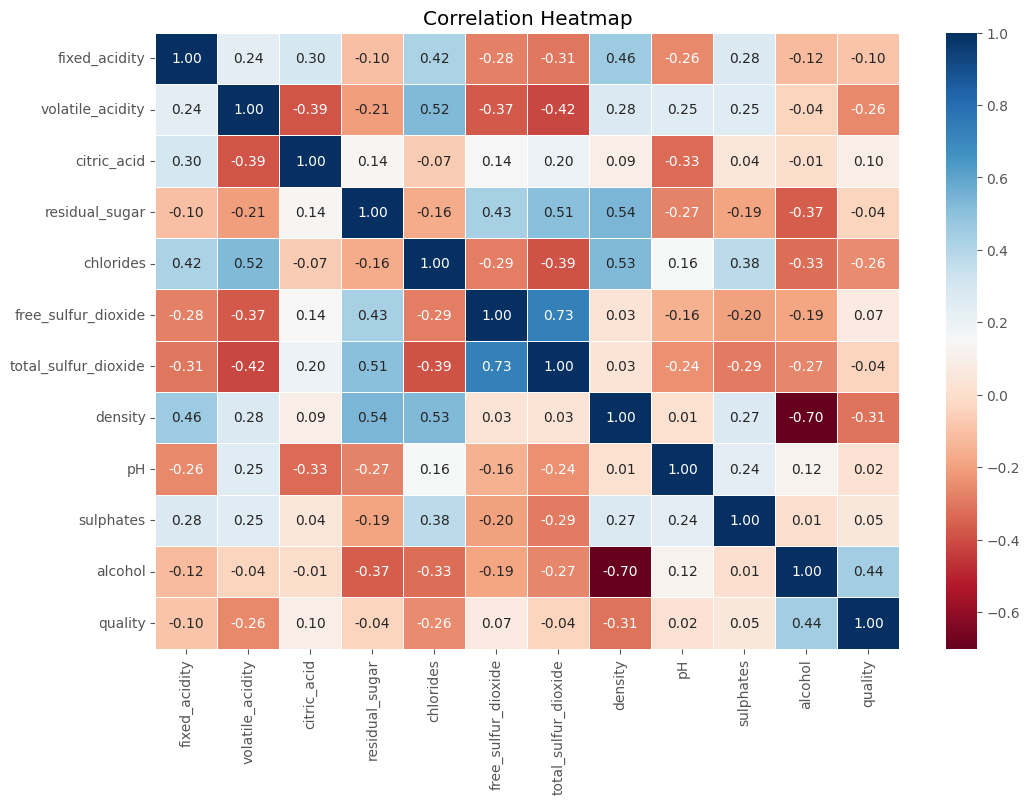

In [14]:
corr = combined.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)

In [16]:
new_df_scaled

array([[ 0.2418641 ,  2.2331519 , -2.09471447, ...,  1.85169992,
         0.25409083, -0.91575791],
       [ 0.61709927,  2.2331519 , -2.09471447, ..., -0.11171274,
         1.16882486, -0.58019986],
       [ 0.61709927,  2.2331519 , -2.09471447, ...,  0.26830261,
         0.94014135, -0.58019986],
       ...,
       [-0.60241502, -0.64151455, -0.95702374, ..., -1.44176647,
        -0.50818753, -0.91575791],
       [-1.54050294, -0.29516919, -0.1227172 , ...,  0.77498975,
        -1.11801022,  1.93648552],
       [-1.07145898, -0.84932176,  0.48405119, ...,  0.26830261,
        -1.57537723,  1.0975904 ]], shape=(6497, 11))

Performing PCA on the scaled dataset. Here we have passed the value 0.95, which makes the function to return data such that we are able to get 95% of the total variance from the original dataset

In [17]:
pca = PCA(0.95)


In [18]:
df_PCA = pca.fit_transform(new_df_scaled)

In [19]:
pca.explained_variance_ratio_

array([0.29466363, 0.23350769, 0.1398457 , 0.08801283, 0.05583386,
       0.05517202, 0.04522676, 0.03502939, 0.02976012])

In [20]:
pca.components_[1]

array([ 0.28535334,  0.06803873,  0.16911759,  0.38034344,  0.28531582,
        0.15188264,  0.1698712 ,  0.57380989, -0.16729168,  0.10954565,
       -0.4879632 ])

<Axes: >

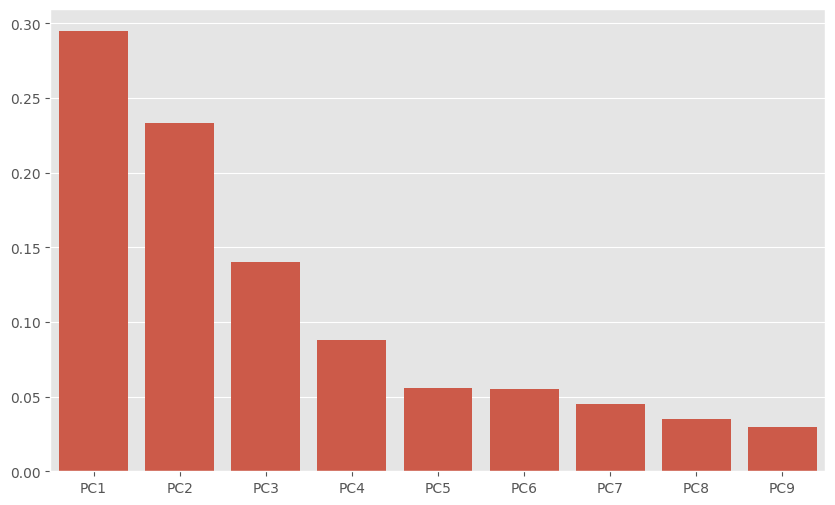

In [21]:
plt.figure(figsize=(10, 6))
x = [f"PC{i}" for i in range(1, len(pca.explained_variance_ratio_) + 1)]
sns.barplot(x=x, y=pca.explained_variance_ratio_)

In [22]:
pca.components_

array([[-0.25902827, -0.3962794 ,  0.14903787,  0.29010253, -0.38930739,
         0.403441  ,  0.45055657, -0.13528106, -0.21004348, -0.29825351,
        -0.02819097],
       [ 0.28535334,  0.06803873,  0.16911759,  0.38034344,  0.28531582,
         0.15188264,  0.1698712 ,  0.57380989, -0.16729168,  0.10954565,
        -0.4879632 ],
       [ 0.47676058, -0.25307694,  0.58982849, -0.15195498, -0.05882813,
        -0.17091836, -0.13798074, -0.12017168, -0.46444065,  0.066442  ,
         0.22669371],
       [-0.09740332, -0.23506423,  0.32999862, -0.09089074,  0.01894032,
         0.27672643,  0.14998081,  0.02847504,  0.4804837 ,  0.68636858,
         0.12605337],
       [ 0.15724939,  0.40616831, -0.18421247, -0.3417399 ,  0.22619172,
         0.5307922 ,  0.3208835 , -0.23272034, -0.36313041,  0.15734682,
         0.11370921],
       [ 0.08591727,  0.30894645, -0.17251356,  0.57774287, -0.33550707,
        -0.02863009, -0.05043512,  0.12717598, -0.14918208,  0.31078337,
         0.531

In [23]:
df_PCA[:, 0]

array([-3.59450276, -3.27545627, -3.54820125, ...,  0.76023036,
        0.89773375,  1.28897526], shape=(6497,))

In [24]:
wq_y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [25]:
wq_y_np = wq_y.to_numpy().ravel()

In [26]:
df_PCA[wq_y_np == 3][:, 0].reshape(-1)

array([-2.97199208, -4.06679928, -4.22390557, -3.55857066, -4.05902294,
       -4.03207835, -3.45386201, -2.62085137, -3.52672451, -3.90541112,
        1.14165689,  0.31677145, -0.69744067,  0.21915323, -0.53255836,
       -0.15724267, -0.69526168,  0.10659596,  0.79195101, -0.42567122,
        1.50807908,  2.17464818,  0.26453769, -1.14984188,  2.28675897,
        2.10433044,  2.79842337,  0.2519823 ,  1.32107902,  2.2373711 ])

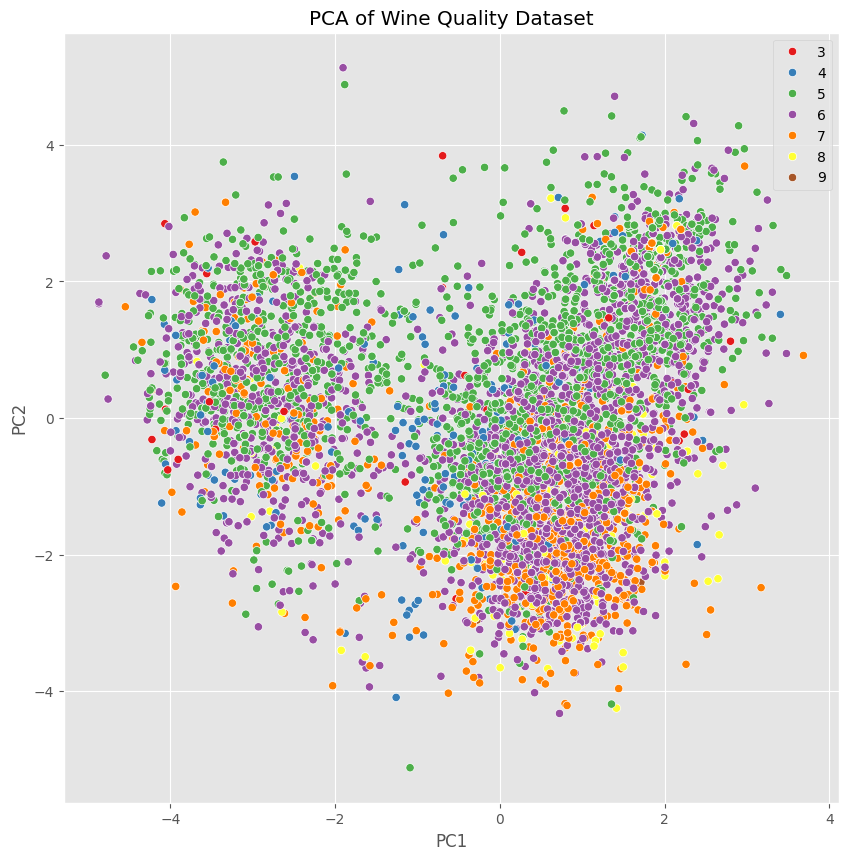

In [27]:
plt.figure(figsize=(10, 10))
plt.xlabel('PC1')
plt.ylabel('PC2')
sns.scatterplot(x = df_PCA[:, 0], y = df_PCA[:, 1], hue = wq_y_np, palette = 'Set1')
plt.title('PCA of Wine Quality Dataset')
plt.show()

In [37]:
fig = px.scatter_3d(
    x=df_PCA[:, 0],
    y=df_PCA[:, 1],
    z=df_PCA[:, 2],
    symbol=wq_y_np,
    color=wq_y_np,
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title='3D PCA Scatter Plot',
    color_continuous_scale=px.colors.sequential.Blackbody
)
fig.update_layout(margin=dict(l = 0, r = 0, b = 0, t =100), width = 1000, height = 800)